In [1]:
# upgrade matplotlib
!pip install --upgrade matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# Restart Kernel for update

# download population.csv from github
!wget "https://raw.githubusercontent.com/datagy/mediumdata/master/populations.csv" -O populations.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
matplotlib: 3.5.2
--2022-07-25 12:25:07--  https://raw.githubusercontent.com/datagy/mediumdata/master/populations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26475 (26K) [text/plain]
Saving to: ‘populations.csv’

populations.csv     100%[===================>]  25.85K  --.-KB/s    in 0.002s  

2022-07-25 12:25:07 (16.1 MB/s) - ‘populations.csv’ saved [26475/26475]



In [2]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/content/populations.csv", thousands=',') # thousands=',' for numbers like 10,000 
# or apply df['colname'] = df['colname'].str.replace(',', '').astype(float) 
df.head()

,Age Group,Year,Males,Females
0,0 to 4 years,1971,938835,897314
1,NaN,1972,921965,879950
2,NaN,1973,916686,871480
3,NaN,1974,911727,865968
4,NaN,1975,908801,862260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age Group  18 non-null     object
 1   Year       918 non-null    int64 
 2   Males      918 non-null    int64 
 3   Females    918 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.8+ KB


In [5]:
df.isnull().sum()

Age Group    900
Year           0
Males          0
Females        0
dtype: int64

In [6]:
df['Age Group'].unique()

array(['0 to 4 years', nan, '5 to 9 years', '10 to 14 years',
       '15 to 19 years', '20 to 24 years', '25 to 29 years',
       '30 to 34 years', '35 to 39 years', '40 to 44 years',
       '45 to 49 years', '50 to 54 years', '55 to 59 years',
       '60 to 64 years', '65 to 69 years', '70 to 74 years',
       '75 to 79 years', '80 to 84 years', '85 to 89 years'], dtype=object)

In [7]:
#df_1971 = df.dropna()
df_1971 = df[df['Year'] == 1971]
df_1971

,Age Group,Year,Males,Females
0,0 to 4 years,1971,938835,897314
51,5 to 9 years,1971,1159468,1108326
102,10 to 14 years,1971,1190275,1139048
153,15 to 19 years,1971,1100056,1064036
204,20 to 24 years,1971,991602,985312
255,25 to 29 years,1971,838454,804810
306,30 to 34 years,1971,685790,656954
357,35 to 39 years,1971,661274,625028
408,40 to 44 years,1971,655406,628748
459,45 to 49 years,1971,623256,629289


In [8]:
fig = px.bar(
    df_1971, 
    x = 'Age Group',
    y = ['Males', 'Females'], 
    title = 'Age Group between male and females in 1971'
)
fig.show()

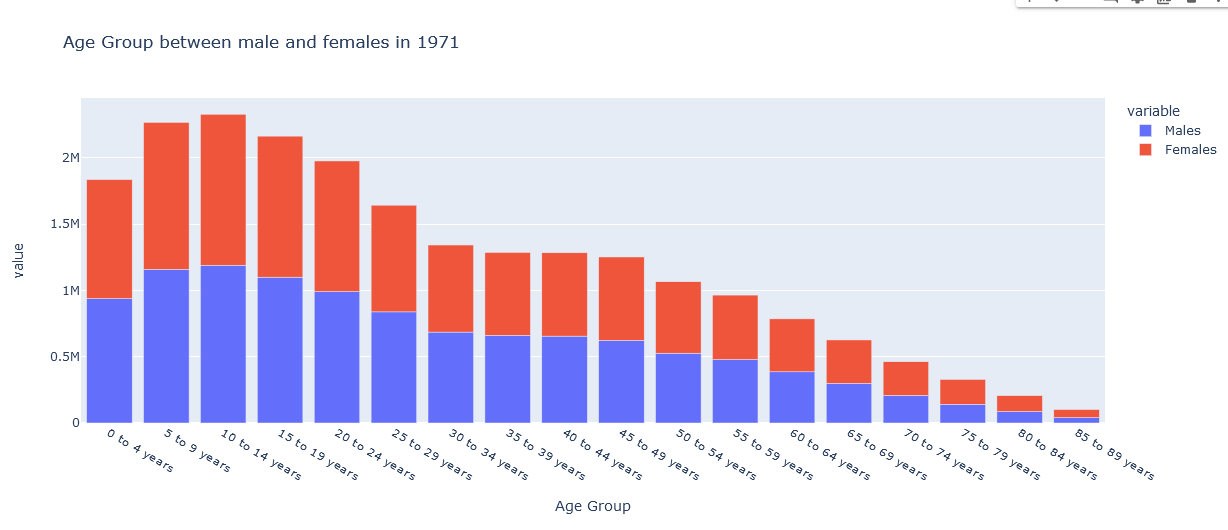

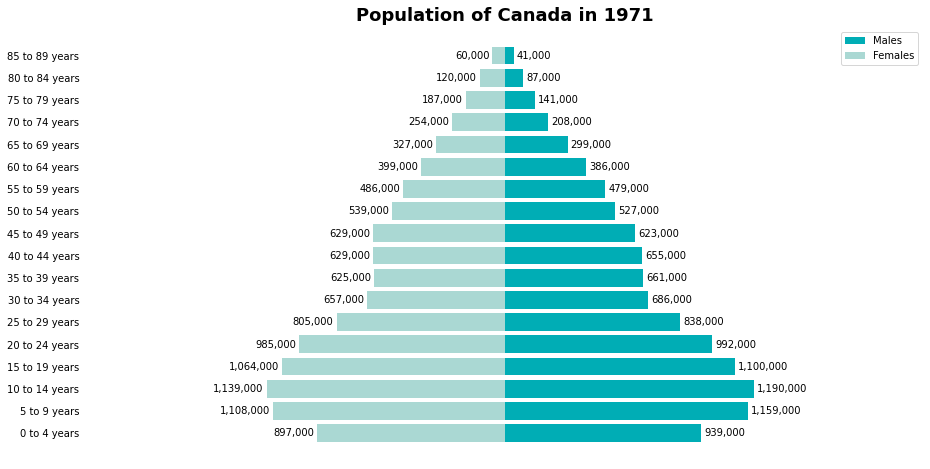

In [9]:
# Create Figure and Axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create Bar Charts
males = plt.barh(
    y = df_1971['Age Group'], 
    width = df_1971['Males'], 
    color = '#00ADB5',
    
    
)

females = plt.barh(
    y = df_1971['Age Group'], 
    width = df_1971['Females'] * -1, # * -1 to reverse Female bars in plot 
    color = '#AAD8D3',
    
)
ax.set_xlim(-2_000_000, 2_000_000)

ax.bar_label(
    males, 
    padding = 3, 
    labels = [f'{round(value, -3):,}' for value in df_1971['Males']]
)

ax.bar_label(
    females, 
    padding = 3, 
    labels = [f'{round(value, -3):,}' for value in df_1971['Females']]
)

# Customize Visual
for edge in ['top', 'right', 'bottom', 'left']:
    ax.spines[edge].set_visible(False)

ax.tick_params(left=False)
ax.get_xaxis().set_visible(False)

ax.legend([males, females], ['Males', 'Females'])

ax.set_title(f'Population of Canada in {1971}', size=18, weight='bold')
plt.show()

### Visualize through years

In [10]:
# impute data
df['Age Group'] = df['Age Group'].fillna(method='ffill')

In [11]:
fig = px.bar(
    df, 
    x = 'Age Group',
    y = ['Males', 'Females'], 
    text_auto='.2s',
    animation_frame = "Year",
    animation_group = "Age Group", 
    title = 'Population of Canada in From 1971 to 2021',
)
fig.show()

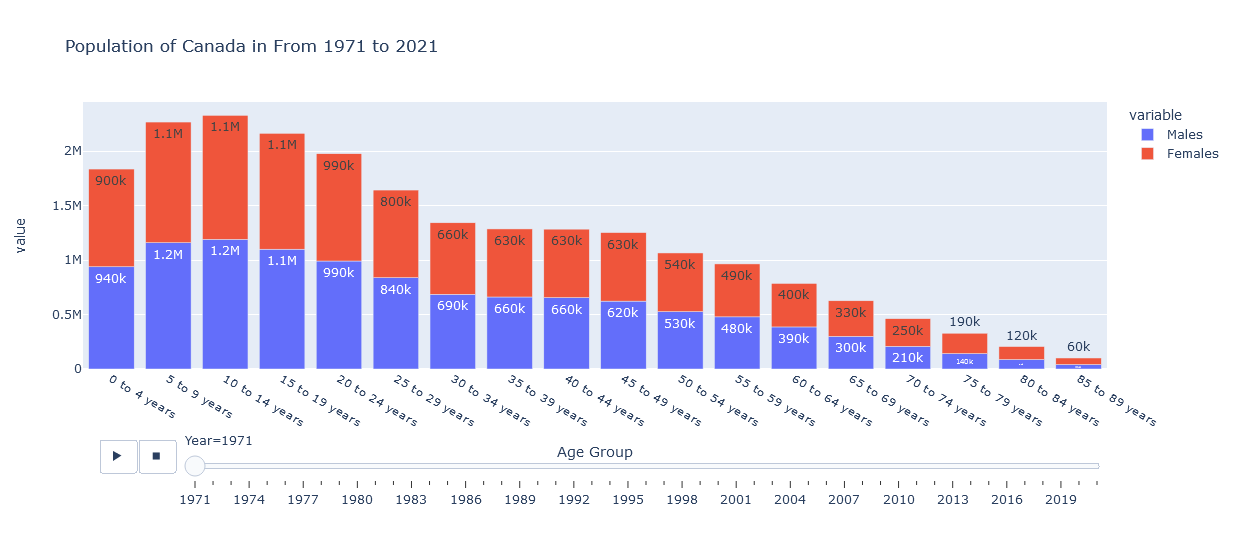

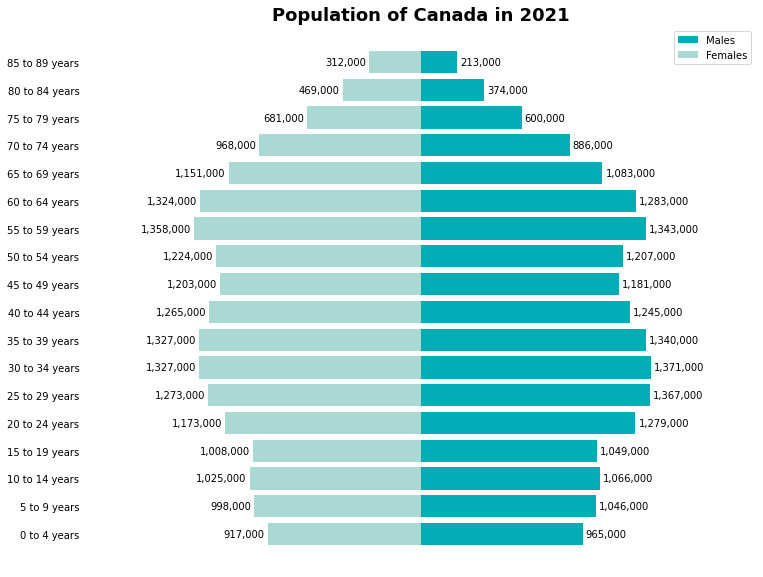

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))

def animate(year=1971):
    ax.clear()
    filtered = df[df['Year'] == year]
    males = plt.barh(
        y = filtered['Age Group'], 
        width = filtered['Males'], 
        color = '#00ADB5'
    )
    females = plt.barh(
        y = filtered['Age Group'], 
        width = filtered['Females'] * -1, 
        color = '#AAD8D3'
    )

    ax.bar_label(
        males, 
        padding = 3, 
        labels=[f'{round(value, -3):,}' for value in filtered['Males']]
    )
    ax.bar_label(
        females, 
        padding = 3, 
        labels=[f'{round(value, -3):,}' for value in filtered['Females']]
    )

    for edge in ['top', 'right', 'bottom', 'left']:
        ax.spines[edge].set_visible(False)

    ax.set_xlim(-2_000_000, 2_000_000)
    ax.tick_params(left=False)
    ax.get_xaxis().set_visible(False)
    ax.legend([males, females], ['Males', 'Females'])
    ax.set_title(f'Population of Canada in {year}', size=18, weight='bold')


animation = FuncAnimation(
    fig,     # figure
    animate, # function
    frames = range( 
        df['Year'].min(),    # 1971 
        df['Year'].max() + 1 # 2021, +1 for range [1971, 2022) = [1971, 2021]
    )
)
# save the animation as gif
animation.save(
  'Population Pyramid.gif', # save as 
  dpi = 300, # delay 
  writer = PillowWriter(fps=5)
)